# Lab 6: Practice Problems.


In [2]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [4]:
rand_idx = runif(1000, min=1, max=dim(diamonds)[1])
dm = diamonds[rand_idx, ]
names(dm)
dim(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

[1] 1000   10

# Reproduce the following plots

![Caption for the picture.](./graph1.png)

In [1]:
# p1 = ggplot() + 
#     geom_point() + 
#     facet_wrap()
# print(p1)

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

![Caption for the picture.](./graph2.png)

In [2]:
# p2 = ggplot() +
#     geom_point() +
#     geom_smooth()
# print(p2)

### 3.6.1 Exercise
1. What geom would you use to draw a line chart? A boxplot? A histogram? An area chart?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predicions.


![Caption for the picture.](./graph4.png)

In [3]:
# p4 = ggplot() + 
#     geom_point() + 
#     geom_smooth()
# print(p4)

1. What does show.legend=FALSE do? What happens if you remove this?
2. What does the se argument in geom_smooth do?
3. Will these two graphs look different? Why / why not?

## Statistical transformations
stat_summary function

![Caption for the picture.](graph6.png)

In [4]:
# ggplot(data = dm) + 
#     stat_summary()

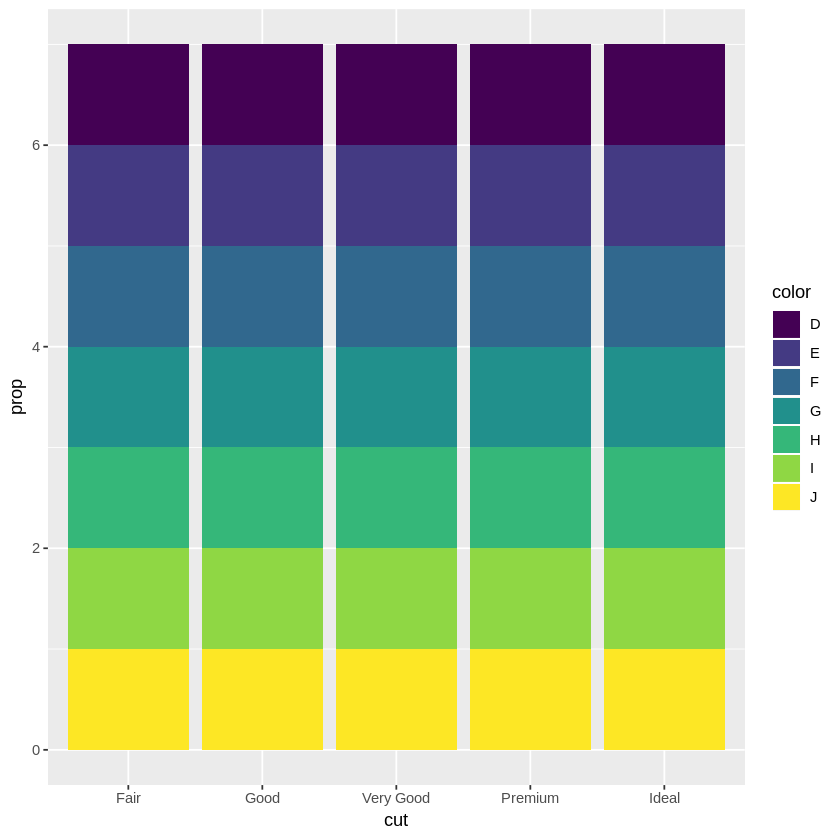

In [17]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))

## Position adjustments

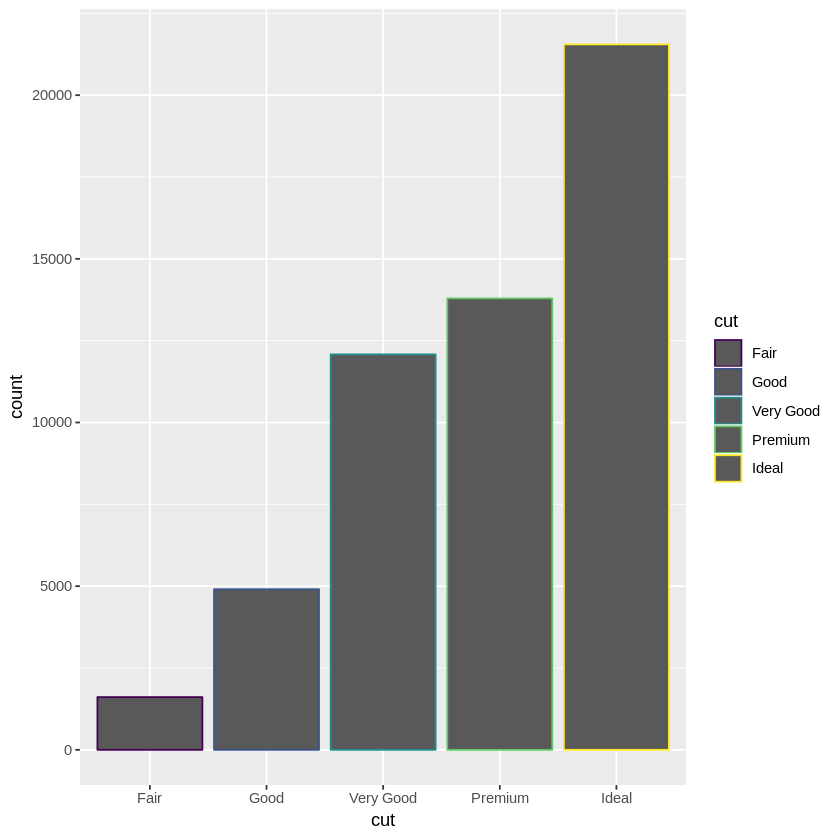

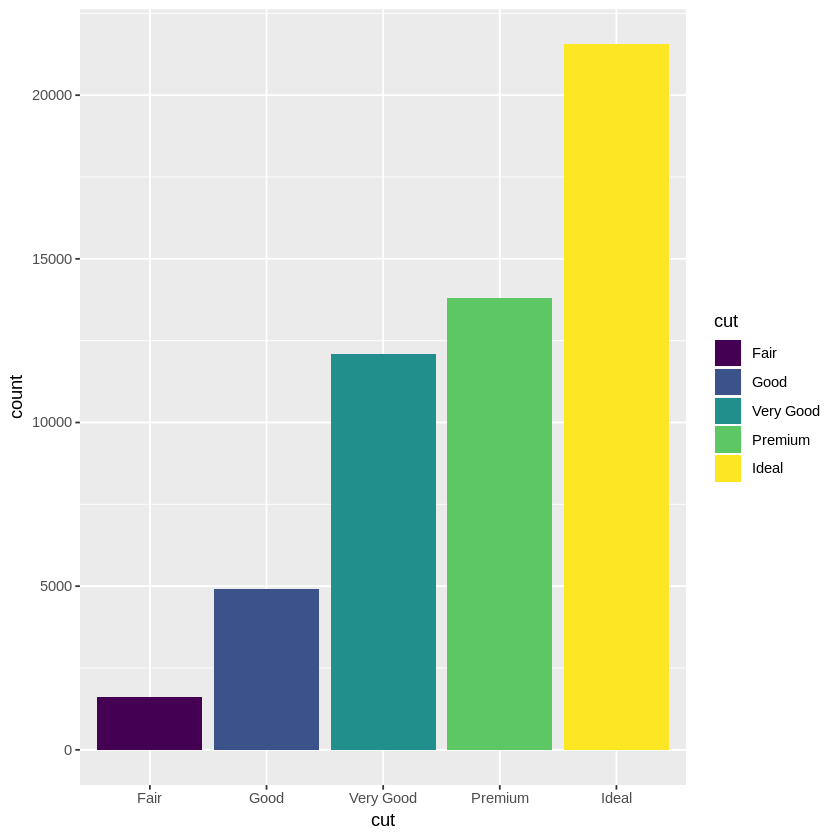

In [18]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

![Caption for the picture.](graph7.png)

In [5]:
# ggplot() + 
#   geom_bar()

*position = "identity"*
This will place each object exactly where it falls in the context of the graph. This is not very useful for bars, because it overlaps them. To see that overlapping we either need to make the bars slightly transparent by setting alpha to a small value, or completely transparent by fill=NA

![Caption for the picture.](graph8.png)

In [6]:
# ggplot() + 
#   geom_bar()

![Caption for the picture.](graph9.png)

In [7]:
# ggplot() + 
#   geom_bar()

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

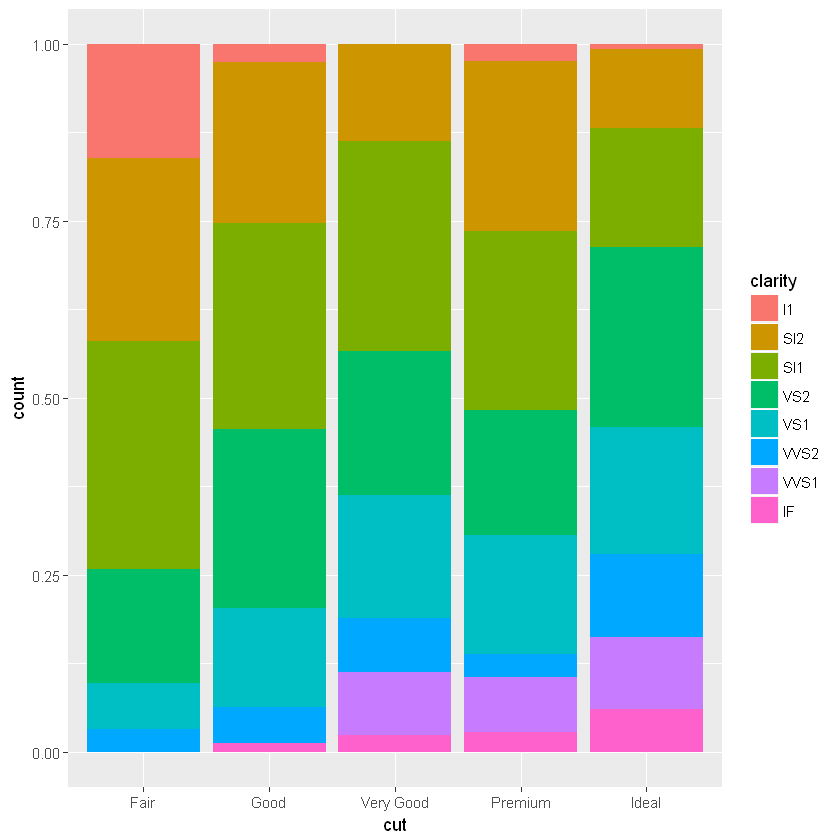

In [13]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

The plot below places overlapping objects directly beside one another, which makes it easier to compare individual values.

![Caption for the picture.](graph10.png)

In [8]:
# ggplot() + 
#   geom_bar()

# Practice Midterm

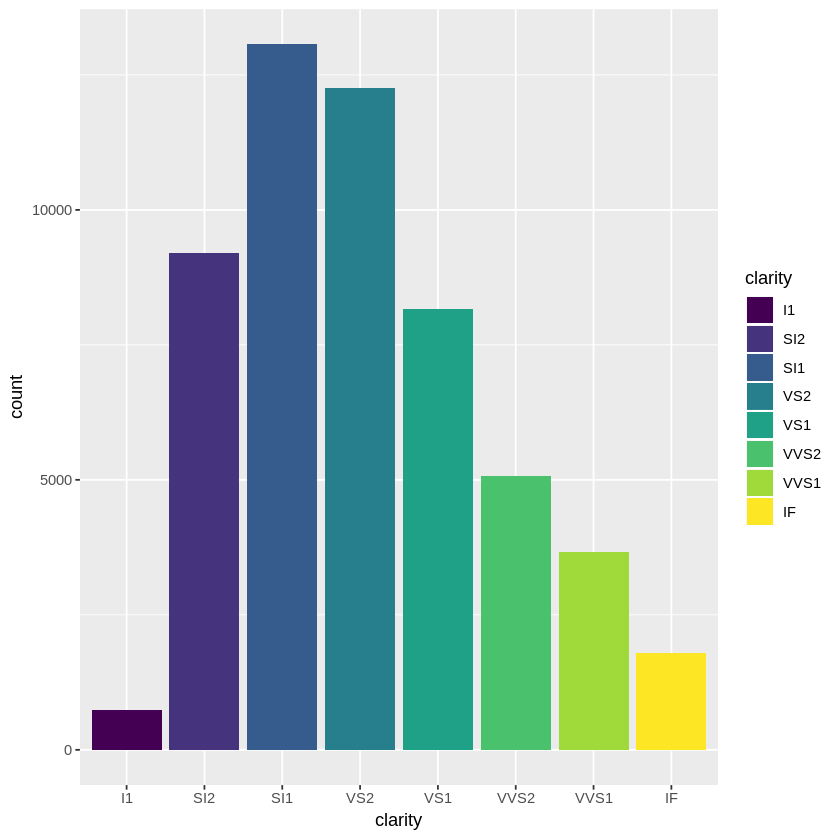

In [35]:
# Problem 6
ggplot(data=diamonds, mapping=aes(x=clarity, fill=clarity)) +
    geom_bar()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin2d).”

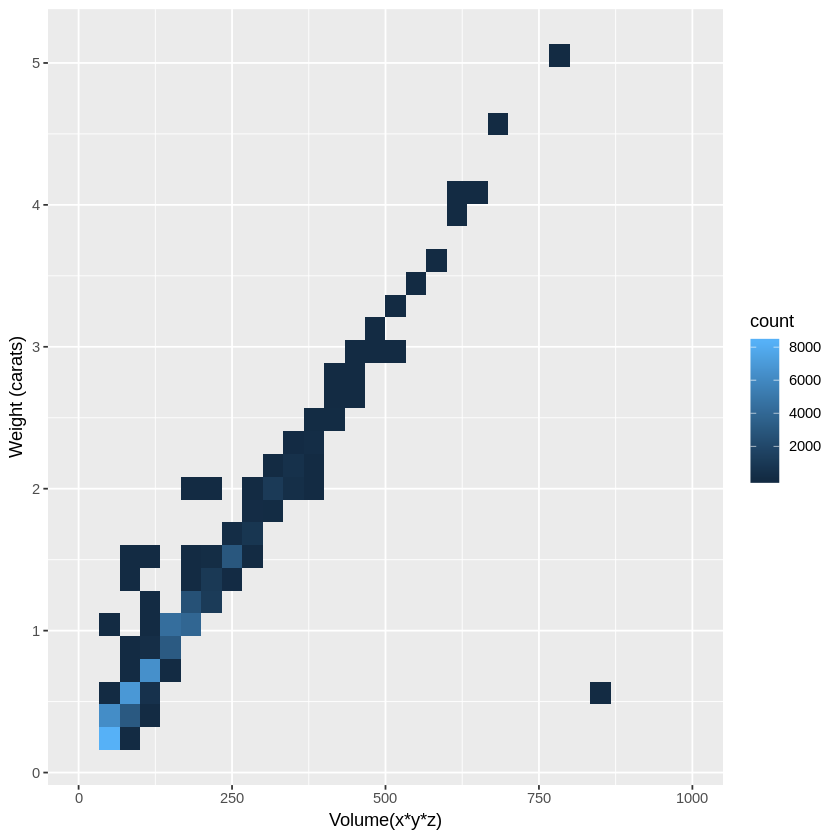

In [36]:
# Problem 7
table7 = diamonds %>% mutate(Volume = x*y*z)
ggplot(data=table7, mapping=aes(x=Volume, y=carat)) + 
    geom_bin2d() + xlim(0, 1000) + 
    xlab('Volume(x*y*z)') + ylab('Weight (carats)')

In [47]:
# Loading football data
load(url('https://github.com/terhorst/stats306/raw/master/ps4/cfb.RData'))

In [117]:
# Reproducing table problem
year_mpg = mpg 
head(year_mpg)

manufacturer,model,1999_cty,1999_hwy,2008_cty,2008_hwy
audi,a4,18.25,27.50,19.66667,29.33333
audi,a4 quattro,16.50,25.25,17.75000,26.25000
audi,a6 quattro,15.00,24.00,16.50000,24.00000
chevrolet,c1500 suburban 2wd,13.00,17.00,12.75000,18.00000
chevrolet,corvette,15.50,24.50,15.33333,25.00000
chevrolet,k1500 tahoe 4wd,12.50,16.00,12.50000,16.50000


In [46]:
# Most 4WD problem
mpg %>% filter(year==1999, drv=='4') %>% 
    group_by(manufacturer, year, drv) %>% summarize(total = n()) %>% 
    arrange(desc(total))

manufacturer,year,drv,total
dodge,1999,4,10
ford,1999,4,9
toyota,1999,4,9
subaru,1999,4,6
audi,1999,4,5
chevrolet,1999,4,2
jeep,1999,4,2
land rover,1999,4,2
mercury,1999,4,2
nissan,1999,4,2


In [76]:
colnames(cfb)

[1] "Year"                 "Game"                 "Count"               
 [4] "Conf Game"            "Week"                 "Winning"             
 [7] "Winning Conference"   "Winning H/A/N"        "Winning Points"      
[10] "Winning F/U"          "Winning Cover"        "Winning Spread"      
[13] "Winning O/U"          "Winning Passes"       "Winning Pass Yards"  
[16] "Winning YPPA"         "Winning Rushes"       "Winning Rush Yards"  
[19] "Winning YPRA"         "Winning Plays"        "Winning Total Yards" 
[22] "Winning YPP"          "Winning TO"           "Winning Pen Yards"   
[25] "Winning TOP"          "Field25"              "Losing"              
[28] "Losing Conference"    "Losing H/A/N"         "Losing Points"       
[31] "Losing F/U"           "Losing Cover"         "Losing Spread"       
[34] "Losing O/U"           "Losing Passes"        "Losing Pass Yards"   
[37] "Losing YPPA"          "Losing Rush Attempts" "Losing Rush Yards"   
[40] "Losing YPRA"          "Losing Total Plays"   "Losing Total Yards"  
[43] "Losing YPP"           "Losing TO"            "Losing Pen Yards"    
[46] "Losing TOP"           "OT?"                  "Thursday?"           
[49] "TOP VERIFICATION"     "O/U Total"            "Tot Yard Dif"        
[52] "TO Margin"

In [75]:
# Finding Big 10 teams
cfb %>% glimpse

Conference,Team
Big 10,Michigan
Big 10,Illinois
Big 10,Penn State
Big 10,Michigan State
Big 10,Wisconsin
Big 10,Purdue
Big 10,Nebraska
Big 10,Ohio State
Big 10,Iowa
Big 10,Northwestern


In [9]:
require(nycflights13)

Loading required package: nycflights13
Warning message:
"package 'nycflights13' was built under R version 3.4.3"

In [141]:
# Rainyday

Joining, by = c("year", "month", "day")


[1] 103621

## Which month had the most missing departure time? How many are missing?

## In February, how many of the canceled flights were on snowy days? 
Let's define snowy days to be similar to rainy days. a) the min temp is less than or equal to freezing and b) precipitation occured during one or more hours in the day

[1] 0.8033307

## Make a bar plot of each month filled with rainy, snowy, and no precipitation day

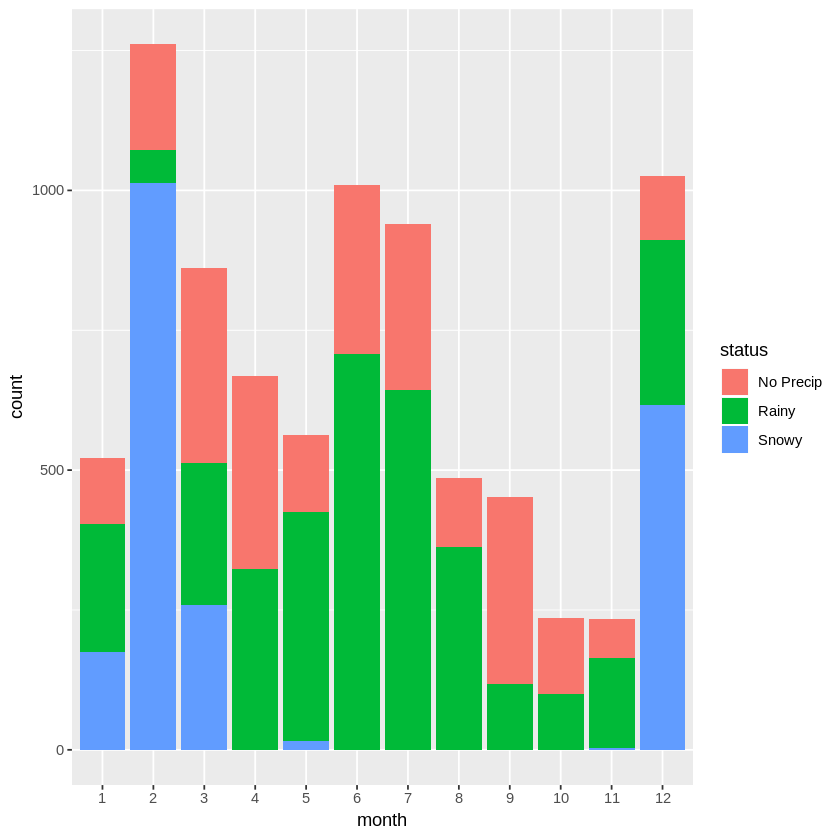